### Imports

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,RandomFlip,RandomRotation,RandomZoom
from tensorflow.keras.models import Sequential
import json
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

In [3]:
train_dir = r'C:/Users/mikow/Desktop/pokemon-dataset-1000/train'
val_dir = r'C:/Users/mikow/Desktop/pokemon-dataset-1000/val'
test_dir = r'C:/Users/mikow/Desktop/pokemon-dataset-1000/test'

### Loading data and preprocessing


In [5]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 323 files belonging to 100 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 262 files belonging to 100 classes.


In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 2041 files belonging to 100 classes.


In [8]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100), dtype=tf.float32, name=None))>

### Data check


Training Data Summary:
Class: abomasnow, Count: 32
Class: abra, Count: 32
Class: absol, Count: 30
Class: accelgor, Count: 16
Class: aegislash-shield, Count: 12
Class: aerodactyl, Count: 32
Class: aggron, Count: 30
Class: aipom, Count: 32
Class: alakazam, Count: 32
Class: alcremie, Count: 10
Class: alomomola, Count: 16
Class: altaria, Count: 30
Class: amaura, Count: 12
Class: ambipom, Count: 32
Class: amoonguss, Count: 16
Class: ampharos, Count: 32
Class: annihilape, Count: 4
Class: anorith, Count: 30
Class: appletun, Count: 10
Class: applin, Count: 10
Class: araquanid, Count: 12
Class: arbok, Count: 32
Class: arboliva, Count: 4
Class: arcanine, Count: 32
Class: arceus, Count: 25
Class: archen, Count: 16
Class: archeops, Count: 16
Class: arctibax, Count: 4
Class: arctovish, Count: 10
Class: arctozolt, Count: 10
Class: ariados, Count: 32
Class: armaldo, Count: 30
Class: armarouge, Count: 4
Class: aromatisse, Count: 16
Class: aron, Count: 30
Class: arrokuda, Count: 10
Class: articuno, Co

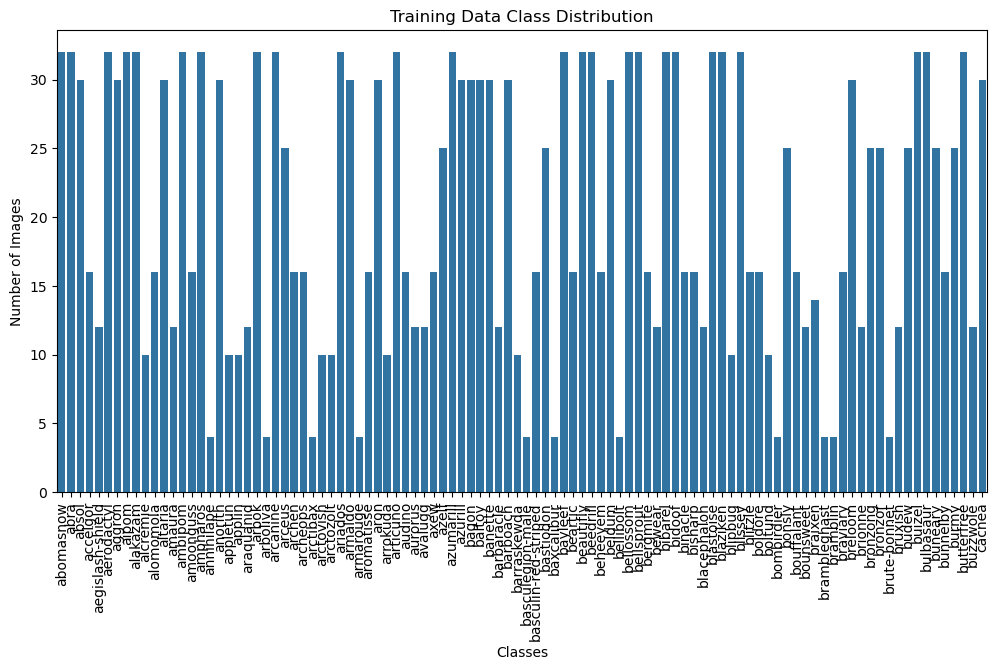

In [10]:
def data_summary(dataset_dir, dataset_name):
    class_counts = Counter()

    # Zliczanie liczby obrazów w każdej klasie
    for cls in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, cls)
        if os.path.isdir(class_path):
            class_counts[cls] = len(os.listdir(class_path))
    
    # Wyświetlanie liczby obrazów w każdej klasie
    print(f"\n{dataset_name} Data Summary:")
    for cls, count in class_counts.items():
        print(f"Class: {cls}, Count: {count}")

    # Wizualizacja rozkładu klas
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title(f"{dataset_name} Data Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=90)
    plt.show()

# Analiza danych treningowych, walidacyjnych i testowych
data_summary(train_dir, "Training")

### Data augmentation

In [12]:
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.5),
    RandomZoom(0.5),
])

### Building Model


In [14]:
model = Sequential()

In [15]:
data_augmentation

In [16]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

In [18]:
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [19]:
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1024,activation='relu'))

In [22]:
model.add(Dense(units=100,activation='softmax'))

### Training model

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)       

In [26]:
training = model.fit(x=training_set,validation_data=validation_set,epochs=12)

Epoch 1/12
64/64 [==============================] - 76s 1s/step - loss: 10.0507 - accuracy: 0.0691 - val_loss: 3.9988 - val_accuracy: 0.1832
Epoch 2/12
64/64 [==============================] - 77s 1s/step - loss: 3.0480 - accuracy: 0.3219 - val_loss: 2.5681 - val_accuracy: 0.4504
Epoch 3/12
64/64 [==============================] - 76s 1s/step - loss: 1.5777 - accuracy: 0.6232 - val_loss: 1.4563 - val_accuracy: 0.7214
Epoch 4/12
64/64 [==============================] - 76s 1s/step - loss: 0.8331 - accuracy: 0.7878 - val_loss: 0.9246 - val_accuracy: 0.8092
Epoch 5/12
64/64 [==============================] - 76s 1s/step - loss: 0.4101 - accuracy: 0.8932 - val_loss: 0.7567 - val_accuracy: 0.8511
Epoch 6/12
64/64 [==============================] - 76s 1s/step - loss: 0.2691 - accuracy: 0.9324 - val_loss: 0.7267 - val_accuracy: 0.8588
Epoch 7/12
64/64 [==============================] - 76s 1s/step - loss: 0.1344 - accuracy: 0.9677 - val_loss: 0.7714 - val_accuracy: 0.8626
Epoch 8/12
64/64 [=

In [27]:
train_loss = model.evaluate(training_set)

64/64 [==============================] - 14s 221ms/step - loss: 0.0058 - accuracy: 0.9990


### Saving Model

In [29]:
model.save("trained_model.keras")

In [30]:
training.history

{'loss': [10.050745010375977,
  3.0479748249053955,
  1.5776865482330322,
  0.8331077694892883,
  0.41006502509117126,
  0.26909545063972473,
  0.1344355195760727,
  0.09960804134607315,
  0.10875877737998962,
  0.06383964419364929,
  0.04529247805476189,
  0.026968756690621376],
 'accuracy': [0.06908378005027771,
  0.32190102338790894,
  0.6232239007949829,
  0.7878490686416626,
  0.8931896090507507,
  0.9323861002922058,
  0.9676629304885864,
  0.9799118041992188,
  0.9750122427940369,
  0.9862812161445618,
  0.9911807775497437,
  0.9926506876945496],
 'val_loss': [3.998774528503418,
  2.5681004524230957,
  1.4563493728637695,
  0.9245824217796326,
  0.756689727306366,
  0.7267417907714844,
  0.7713868618011475,
  0.7821065187454224,
  0.7908378839492798,
  0.8118048906326294,
  0.717586100101471,
  0.6621071100234985],
 'val_accuracy': [0.18320611119270325,
  0.45038166642189026,
  0.7213740348815918,
  0.8091602921485901,
  0.8511450290679932,
  0.8587786555290222,
  0.862595438957

In [31]:
training_history = training.history


In [32]:
with open("training_history.json","w") as f:
    json.dump(training_history,f)

### Predicting Model

In [34]:
class_name = validation_set.class_names

In [35]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 262 files belonging to 100 classes.


In [36]:
y_pred = model.predict(validation_set)
y_pred, y_pred.shape

9/9 [==============================] - 2s 205ms/step


(array([[9.99500453e-01, 9.07356059e-14, 2.98045100e-09, ...,
         8.77259290e-12, 1.71388859e-08, 3.95054073e-10],
        [9.99861717e-01, 9.68848313e-15, 8.00231865e-05, ...,
         1.90053834e-10, 1.05867990e-08, 8.52362625e-12],
        [9.93164957e-01, 3.15379840e-11, 2.43717068e-06, ...,
         6.42058069e-08, 6.39588834e-05, 6.95831730e-08],
        ...,
        [1.53991621e-07, 1.16284156e-08, 1.26696681e-10, ...,
         7.90796664e-11, 5.44159093e-07, 9.99366343e-01],
        [1.41737785e-11, 2.85833977e-07, 2.01672692e-10, ...,
         3.86985270e-11, 8.39476377e-10, 9.98875439e-01],
        [1.70754184e-08, 1.07251265e-06, 7.88653975e-10, ...,
         1.25738525e-11, 8.60785294e-05, 9.94975209e-01]], dtype=float32),
 (262, 100))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(262,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  3,  3, 45,  5,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  7,  8, 23,  8,  8,  9, 10, 10, 11, 11,
       11, 12, 13, 13, 13, 13, 14, 68, 15, 15, 15, 15, 16, 16, 16, 17, 17,
       17, 18, 19, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 24, 24,
       24, 25, 25, 26, 26, 27, 27, 27, 28, 43, 30, 30, 30, 30, 31, 31, 31,
       32, 32, 32, 33, 10, 34, 34, 34, 35, 36, 36, 70, 36, 37, 37, 38, 39,
       40, 40, 41, 62, 41, 42, 42, 42, 42, 43, 43, 43, 44, 44, 96, 45, 45,
       10, 46, 46, 37, 47, 48,  0, 48, 49, 50, 50, 50, 51, 51, 52, 52, 52,
       53, 53, 53, 54, 54, 54, 54, 55, 55, 56, 56, 56, 56, 57, 57, 70, 57,
       58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63,
       88, 64, 65, 65, 65, 65, 66, 66, 66, 66, 98, 67, 68, 68, 69, 70, 36,
       70, 70, 71, 71, 71, 71, 72, 73, 73, 73, 73, 81, 74, 75, 75, 76, 77,
       77, 77, 78, 78, 78, 79, 79, 78, 81, 82, 82, 82,

In [39]:
true_categories = tf.concat([y for x,y in validation_set], axis=0)
true_categories

<tf.Tensor: shape=(262, 100), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(262,), dtype=int64, numpy=
array([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  3,  3,  4,  5,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  9, 10, 10, 11, 11,
       11, 12, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 16, 16, 16, 17, 17,
       17, 18, 19, 20, 21, 21, 21, 21, 22, 22, 22, 23, 23, 23, 23, 24, 24,
       24, 25, 25, 26, 26, 27, 27, 27, 28, 29, 30, 30, 30, 30, 31, 31, 31,
       32, 32, 32, 33, 33, 34, 34, 34, 35, 36, 36, 36, 36, 37, 37, 38, 39,
       40, 40, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 44, 44, 44, 45, 45,
       45, 46, 46, 46, 47, 48, 48, 48, 49, 50, 50, 50, 51, 51, 52, 52, 52,
       53, 53, 53, 54, 54, 54, 54, 55, 55, 56, 56, 56, 56, 57, 57, 57, 57,
       58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 61, 61, 62, 62, 62, 62, 63,
       63, 64, 65, 65, 65, 65, 66, 66, 66, 66, 67, 67, 68, 68, 69, 70, 70,
       70, 70, 71, 71, 71, 71, 72, 73, 73, 73, 73, 74, 74, 75, 75, 76, 77,
       77, 77, 78, 78, 78, 79, 79, 80, 81, 82, 82, 82,

In [41]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                      precision    recall  f1-score   support

           abomasnow       0.80      1.00      0.89         4
                abra       1.00      1.00      1.00         4
               absol       1.00      1.00      1.00         3
            accelgor       1.00      1.00      1.00         2
    aegislash-shield       0.00      0.00      0.00         1
          aerodactyl       1.00      1.00      1.00         4
              aggron       1.00      1.00      1.00         3
               aipom       1.00      1.00      1.00         4
            alakazam       1.00      0.75      0.86         4
            alcremie       1.00      1.00      1.00         1
           alomomola       0.50      1.00      0.67         2
             altaria       1.00      1.00      1.00         3
              amaura       1.00      1.00      1.00         1
             ambipom       1.00      1.00      1.00         4
           amoonguss       1.00      0.50      0.67         2
       

C:\Users\mikow\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikow\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mikow\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix

In [43]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(100, 100)

Text(470.72222222222223, 0.5, 'Actual Class')

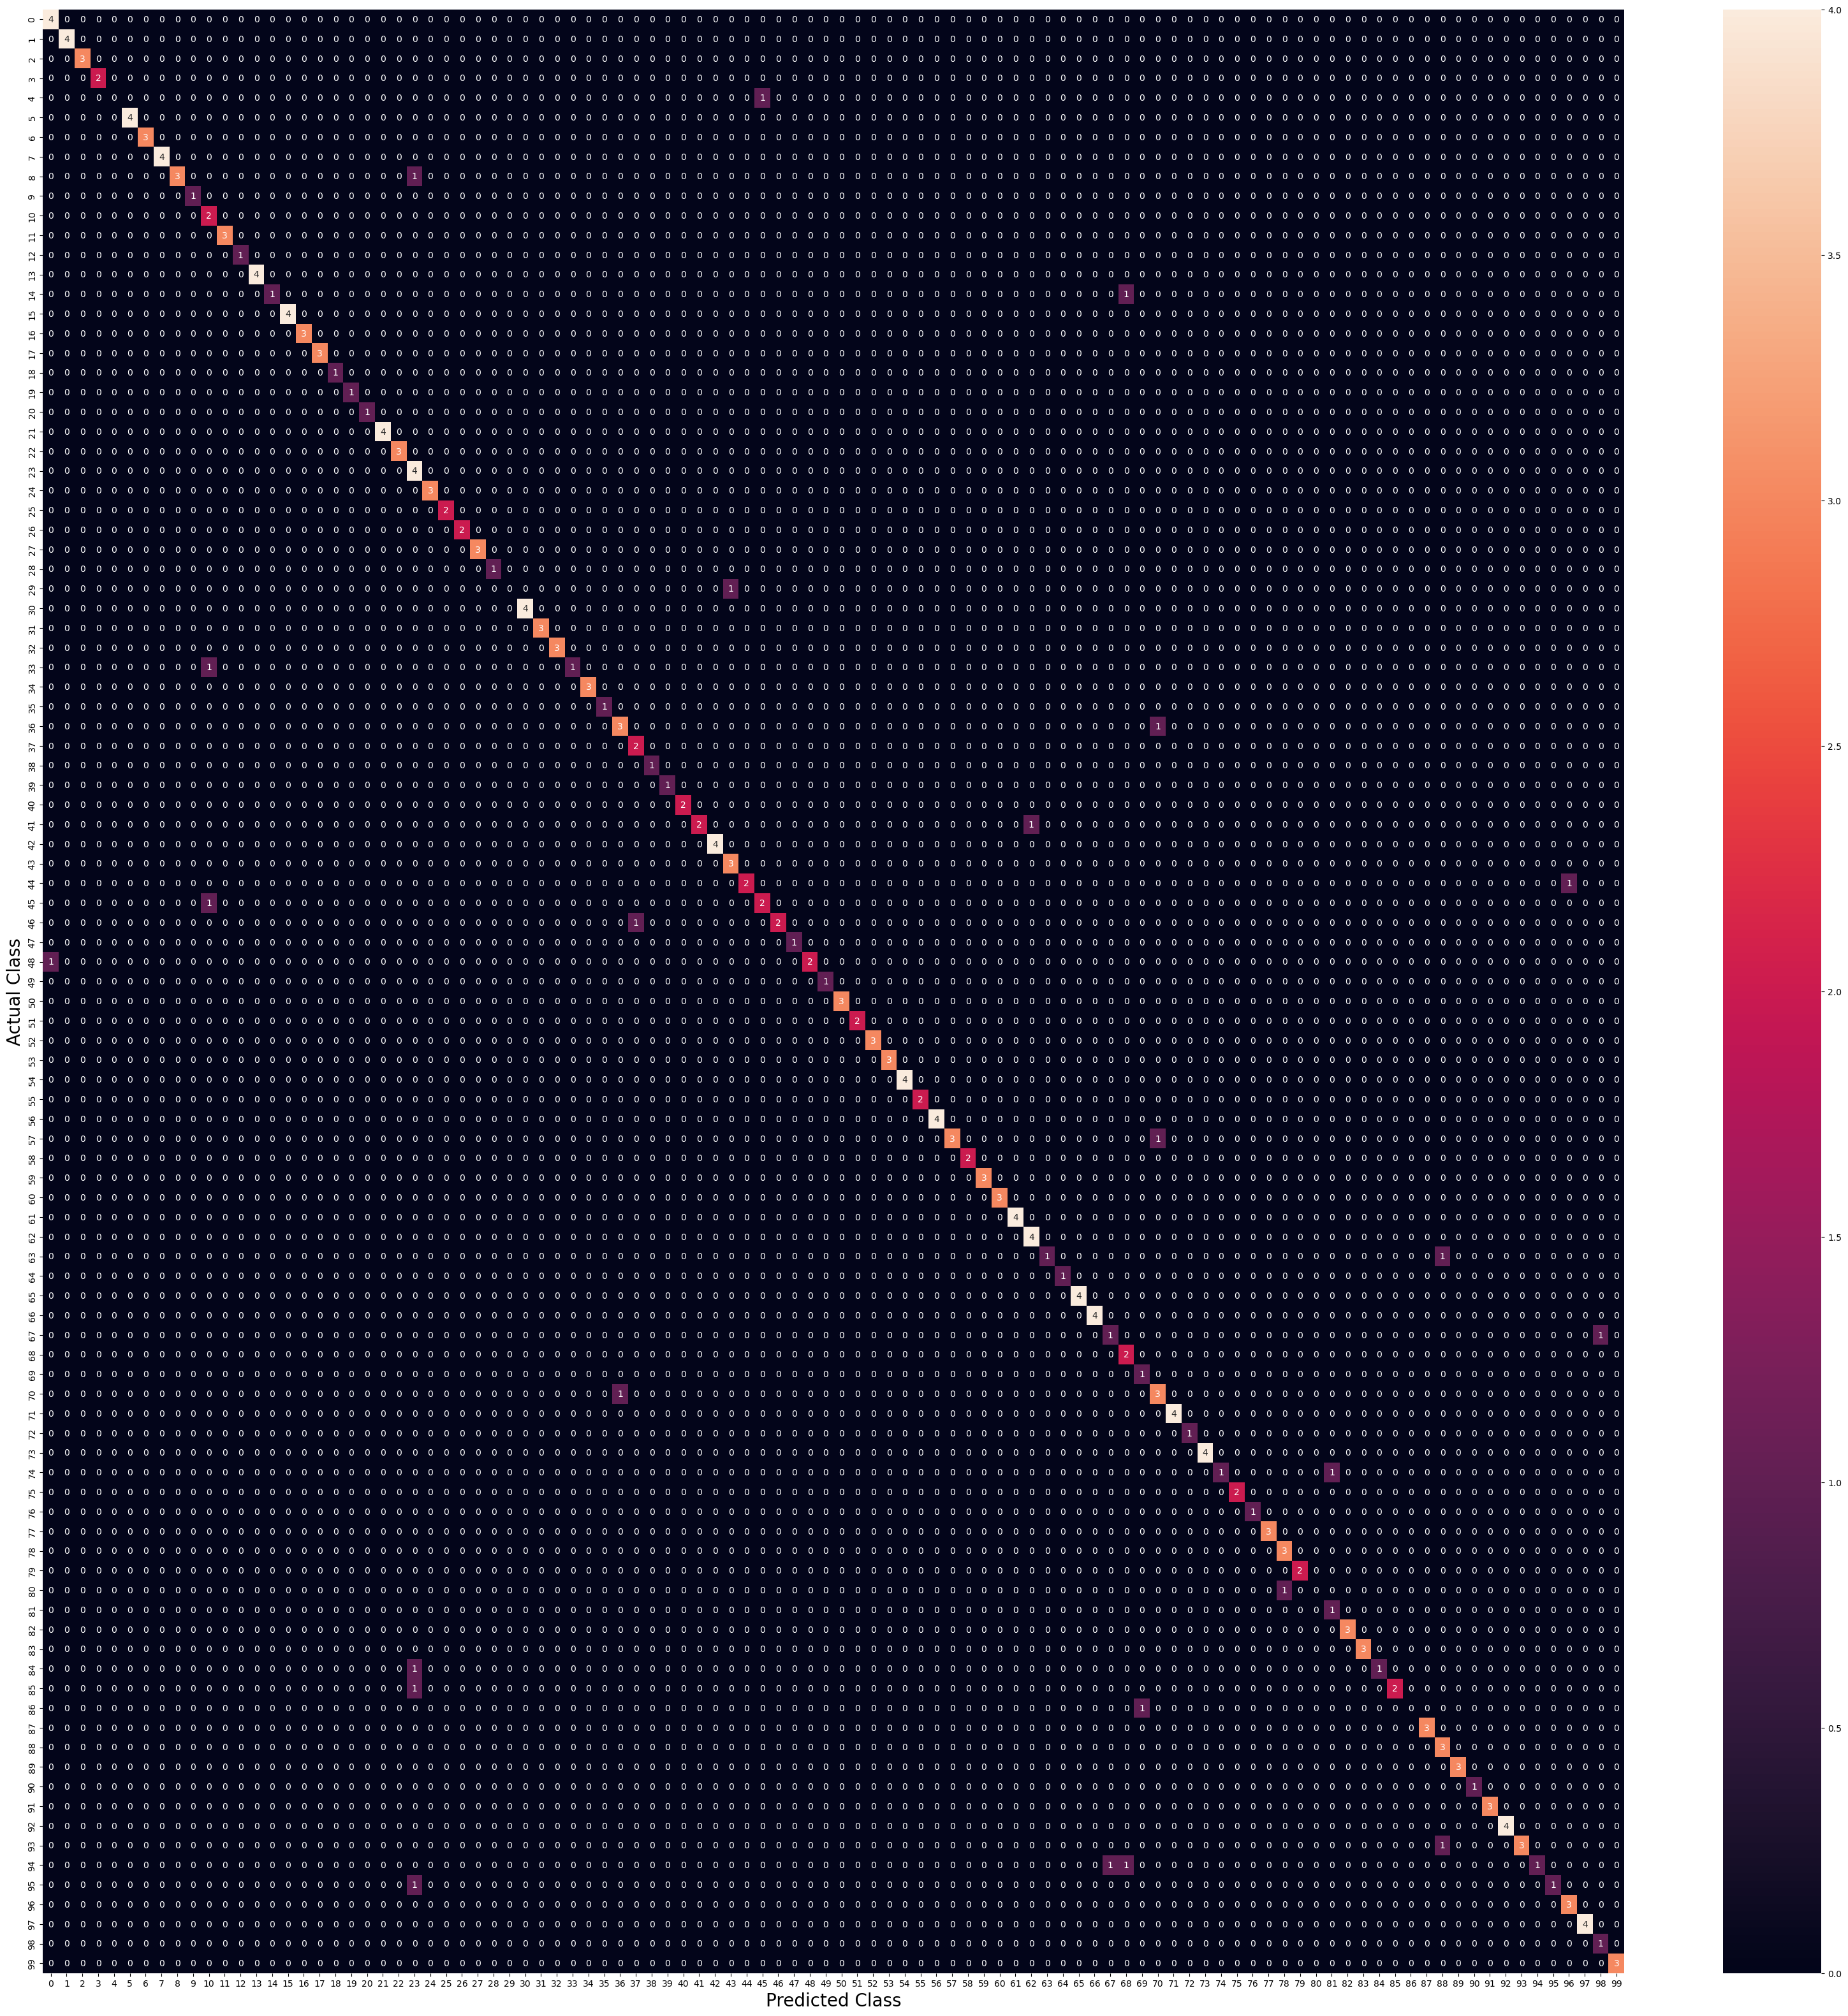

In [44]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)

### Testing image augmentation

In [46]:
with open('class_names.json', 'w') as f:
    json.dump(training_set.class_names, f)

In [47]:
image_path = r"C:/Users/mikow/Desktop/pokemon-dataset-1000/train/aegislash-shield/aegislash-shield_2.png"

In [48]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = tf.expand_dims(image_array, axis=0)

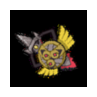

In [49]:
plt.figure(figsize=(1, 1))
augmented_image = data_augmentation(image_array,training=True)
plt.imshow(tf.keras.preprocessing.image.array_to_img(augmented_image[0]))  # Konwersja obrazu do formatu wyświetlania
plt.axis('off')

plt.show()